# ЗАДАНИЕ 6. ПРИМЕНЕНИЕ ФИКТИВНЫХ ПЕРЕМЕННЫХ ДЛЯ МОДЕЛИРОВАНИЯ СЕЗОННЫХ КОЛЕБАНИЙ

In [2]:
import os
import pandas as pd 
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
import scipy.stats
import seaborn as sns
from scipy.stats import t as student
from sklearn.linear_model import LinearRegression

In [3]:
os.chdir("C:/Users/HP/Documents/analysis/TS/data/")

In [4]:
data = pd.read_excel('data.xls', sheet_name='Material 2')
data.head()

,Unnamed: 0,Unnamed: 1,Рыночные цены на материал 2 (руб.),Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49
0,NaN,NaN,2007-01-01 00:00:00,2007-02-01 00:00:00,2007-03-01 00:00:00,2007-04-01 00:00:00,2007-05-01 00:00:00,2007-06-01 00:00:00,2007-07-01 00:00:00,2007-08-01 00:00:00,...,2010-03-01 00:00:00,2010-04-01 00:00:00,2010-05-01 00:00:00,2010-06-01 00:00:00,2010-07-01 00:00:00,2010-08-01 00:00:00,2010-09-01 00:00:00,2010-10-01 00:00:00,2010-11-01 00:00:00,2010-12-01 00:00:00
1,№ организации,1.0,4.22,3.99,4.05,4.34,4.63,4.76,5.09,5.13,...,3.81,4.03,4.13,4.4,4.66,4.79,4.57,4.4,4.26,3.82
2,NaN,2.0,4,4.14,4.43,4.79,5.1,5.17,5.12,4.89,...,4.87,5.19,5.29,5.46,5.45,5.15,4.94,4.6,4.41,4.35
3,NaN,3.0,3.9,3.74,3.9,4.13,4.31,4.66,4.76,4.85,...,4.23,4.48,4.71,5.05,5.21,5.21,5.19,5.08,4.77,4.53
4,NaN,4.0,3.64,3.94,4.09,4.73,5,5.46,5.46,5.41,...,4.23,4.55,5.1,5.41,5.62,5.36,5.05,4.54,4.24,3.83


In [5]:
dates = data.loc[data.index == 0].values[0, 2:]
val = data.loc[data.index == 1].values[0, 2:]

In [6]:
data={"Date": dates, "Value": val}

In [7]:
my_data = pd.DataFrame(data)
my_data.head()

,Date,Value
0,2007-01-01,4.22
1,2007-02-01,3.99
2,2007-03-01,4.05
3,2007-04-01,4.34
4,2007-05-01,4.63


In [8]:
my_data=my_data.set_index('Date')
my_data.head()

,Value
Date,
2007-01-01,4.22
2007-02-01,3.99
2007-03-01,4.05
2007-04-01,4.34
2007-05-01,4.63


In [9]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2007-01-01 to 2010-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Value   48 non-null     object
dtypes: object(1)
memory usage: 768.0+ bytes


In [10]:
my_data.Value=my_data.Value.astype(float)

In [11]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2007-01-01 to 2010-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   48 non-null     float64
dtypes: float64(1)
memory usage: 768.0 bytes


In [12]:
series=my_data.squeeze()
type(series)

pandas.core.series.Series

In [13]:
y = series.values

In [14]:
t = np.arange(1, len(y) + 1)
t

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])

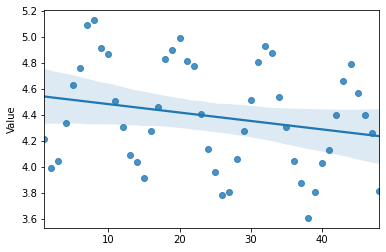

In [15]:
sns.regplot(x=t, y="Value", data=my_data);

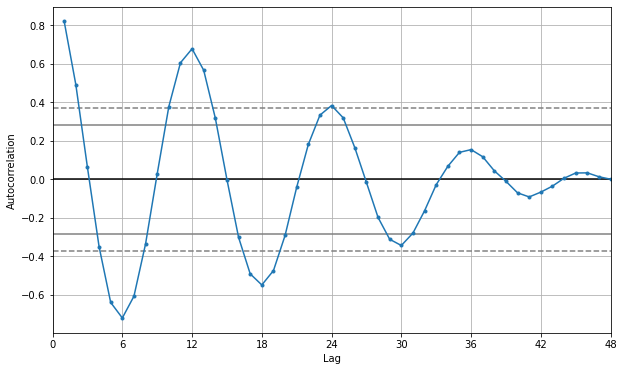

In [16]:
fig, ax = plt.subplots(figsize = (10, 6))

autocorrelation_plot(y, ax = ax, marker = '.')
ax.xaxis.set_major_locator(plt.MultipleLocator(6))
ax.set_xlim(0, 48)

plt.show()

In [17]:
dataframe = pd.DataFrame()
dataframe['month'] = [series.index[i].month for i in range(len(series))]
dataframe['year'] = [series.index[i].year for i in range(len(series))]
dataframe['price'] = [series[i] for i in range(len(series))]
dataframe['t'] = np.arange(1, len(series) + 1)
print(dataframe.head(5))

   month  year  price  t
0      1  2007   4.22  1
1      2  2007   3.99  2
2      3  2007   4.05  3
3      4  2007   4.34  4
4      5  2007   4.63  5


In [18]:
dataframe.month=dataframe.month.astype(object)

In [19]:
dataframe=pd.get_dummies(dataframe)
dataframe.head()

,year,price,t,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,2007,4.22,1,1,0,0,0,0,0,0,0,0,0,0,0
1,2007,3.99,2,0,1,0,0,0,0,0,0,0,0,0,0
2,2007,4.05,3,0,0,1,0,0,0,0,0,0,0,0,0
3,2007,4.34,4,0,0,0,1,0,0,0,0,0,0,0,0
4,2007,4.63,5,0,0,0,0,1,0,0,0,0,0,0,0


In [20]:
dataframe.pop('month_1')
dataframe.head()

,year,price,t,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,2007,4.22,1,0,0,0,0,0,0,0,0,0,0,0
1,2007,3.99,2,1,0,0,0,0,0,0,0,0,0,0
2,2007,4.05,3,0,1,0,0,0,0,0,0,0,0,0
3,2007,4.34,4,0,0,1,0,0,0,0,0,0,0,0
4,2007,4.63,5,0,0,0,1,0,0,0,0,0,0,0


In [35]:
array = dataframe.values
# separate array into input and output components
x_train = array[0:36,2:14]
y_train = array[0:36,1]
x_test = array[36:48,2:14]
y_test= array[36:48,1]

In [36]:
len(x_train)

36

In [37]:
len(y_train)

36

In [38]:
len(x_test)

12

In [39]:
len(y_test)

12

In [40]:
model = LinearRegression().fit(x_train, y_train)
model

LinearRegression()

In [41]:
model.intercept_

4.219999999999999

In [42]:
model.coef_

array([-0.01      , -0.14      , -0.14333333,  0.16666667,  0.40666667,
        0.66333333,  0.90333333,  0.99666667,  0.86333333,  0.73      ,
        0.42      ,  0.18666667])

In [203]:
# Расчетные значения по модели на тестовом наборе
y_pred = model.predict(x_test) 
y_pred

array([3.70333333, 3.69      , 3.99      , 4.22      , 4.46666667,
       4.69666667, 4.78      , 4.63666667, 4.49333333, 4.17333333,
       3.93      ])

In [204]:
R2 = r2_score(y_test, y_pred)
print('R2: %f' % R2)

R2: 0.950763


In [205]:
MSE = mean_squared_error(y_test, y_pred)
print('MSE: %f' % MSE)

MSE: 0.006497


In [206]:
x = array[:,2:14]
y = array[:,1]

In [207]:
model = LinearRegression().fit(x, y)
model

LinearRegression()

In [208]:
model.intercept_

4.236736111111113

In [209]:
model.coef_

array([-0.01048611, -0.16951389, -0.11902778,  0.17145833,  0.37944444,
        0.64243056,  0.89041667,  0.99590278,  0.84388889,  0.704375  ,
        0.43986111,  0.15784722])

In [210]:
# Расчетные значения по модели на всем наборе
y_pred = model.predict(x) 
y_pred

array([4.22625   , 4.04625   , 4.08625   , 4.36625   , 4.56375   ,
       4.81625   , 5.05375   , 5.14875   , 4.98625   , 4.83625   ,
       4.56125   , 4.26875   , 4.10041667, 3.92041667, 3.96041667,
       4.24041667, 4.43791667, 4.69041667, 4.92791667, 5.02291667,
       4.86041667, 4.71041667, 4.43541667, 4.14291667, 3.97458333,
       3.79458333, 3.83458333, 4.11458333, 4.31208333, 4.56458333,
       4.80208333, 4.89708333, 4.73458333, 4.58458333, 4.30958333,
       4.01708333, 3.84875   , 3.66875   , 3.70875   , 3.98875   ,
       4.18625   , 4.43875   , 4.67625   , 4.77125   , 4.60875   ,
       4.45875   , 4.18375   , 3.89125   ])

In [211]:
R2 = r2_score(y, y_pred)
print('R2: %f' % R2)

R2: 0.981545


In [212]:
MAE = mean_absolute_error(y, y_pred)
print('MAE: %f' % MAE)

MAE: 0.044010


In [213]:
MSE = mean_squared_error(y, y_pred)
print('MSE: %f' % MSE)

MSE: 0.002928


In [214]:
# calculate root mean squared error
RMSE = sqrt(MSE)
print('RMSE: %f' % RMSE)

RMSE: 0.054114


In [215]:
my_data['Error']=y-y_pred
my_data.head()

,Value,Error
Date,,
2007-01-01,4.22,-0.00625
2007-02-01,3.99,-0.05625
2007-03-01,4.05,-0.03625
2007-04-01,4.34,-0.02625
2007-05-01,4.63,0.06625


<AxesSubplot:xlabel='Date'>

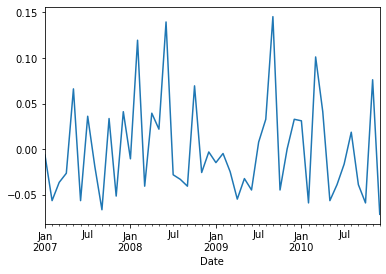

In [216]:
my_data.Error.plot()

In [217]:
my_data.Error.describe()

count    4.800000e+01
mean    -9.251859e-18
std      5.468640e-02
min     -7.125000e-02
25%     -4.041667e-02
50%     -1.541667e-02
75%      3.312500e-02
max      1.454167e-01
Name: Error, dtype: float64

<AxesSubplot:>

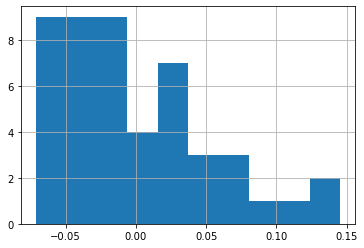

In [218]:
my_data.Error.hist()

<AxesSubplot:ylabel='Density'>

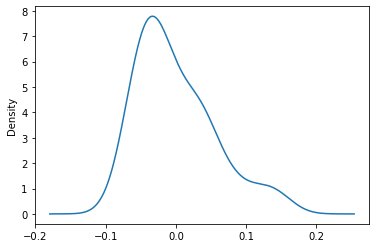

In [219]:
my_data.Error.plot(kind='kde')

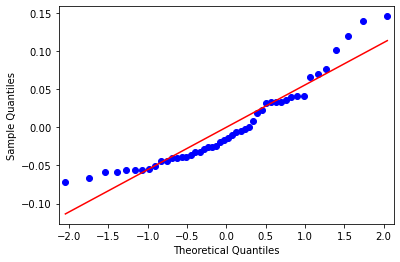

In [220]:
qqplot(my_data.Error, line='r')
plt.show()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

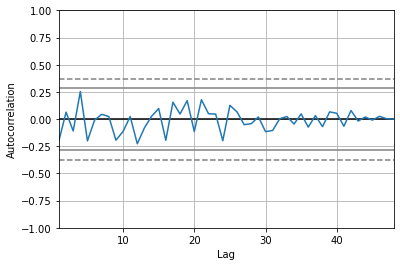

In [221]:
autocorrelation_plot(my_data.Error)

<p><a name="Intervals"></a></p>

# Построение интервального прогноза

$$\frac{\hat{Y_i}-Y_i}{\sigma} \sim T(n) $$ 
где $$\sigma^2 = \frac{\sum_{i=1}^{n}(Y_i-\hat{Y_i})^2}{n-1} $$
-выборочная дисперсия
$$ P(-T_{n,\alpha} < \frac{\hat{Y_i}-Y_i}{\sigma} < T_{n,\alpha} ) = \alpha $$
$$ \left (\hat{Y_i} -T_{n,\alpha}\cdot \sigma \leq Y_i \leq \hat{Y_i} +T_{n,\alpha}\cdot \sigma \right ) $$

In [222]:
sigma=scipy.stats.sem(y)
sigma

0.058103619380434325

In [223]:
confidence=0.95
tstu=scipy.stats.t.ppf((1 + confidence) / 2., len(y)-1)
tstu

2.0117405104757546

In [43]:
t_new = np.arange(len(y) + 1,len(y)+13)
t_new=t_new.reshape(-1,1)
t_new

array([[49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60]])

In [44]:
d=array[0:12,3:14]
d

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [226]:
df_t_new=pd.DataFrame(t_new)

In [227]:
df_d=pd.DataFrame(d)

In [228]:
x_new=pd.concat([df_t_new,df_d],axis=1,names=['t', 'd2','d3','d4','d5','d6','d7','d8','d9','d10','d11','d12'])
x_new

,0,0,1,2,3,4,5,6,7,8,9,10
0,49,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,50,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,51,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,52,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,53,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,54,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,55,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,56,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [229]:
# Прогнозные значения по модели
y_new = model.predict(x_new) 
y_new

array([3.72291667, 3.54291667, 3.58291667, 3.86291667, 4.06041667,
       4.31291667, 4.55041667, 4.64541667, 4.48291667, 4.33291667,
       4.05791667, 3.76541667])

In [230]:
y_up=y_new+tstu*sigma
y_up

array([3.83980607, 3.65980607, 3.69980607, 3.97980607, 4.17730607,
       4.42980607, 4.66730607, 4.76230607, 4.59980607, 4.44980607,
       4.17480607, 3.88230607])

In [231]:
y_down=y_new-tstu*sigma
y_down

array([3.60602726, 3.42602726, 3.46602726, 3.74602726, 3.94352726,
       4.19602726, 4.43352726, 4.52852726, 4.36602726, 4.21602726,
       3.94102726, 3.64852726])

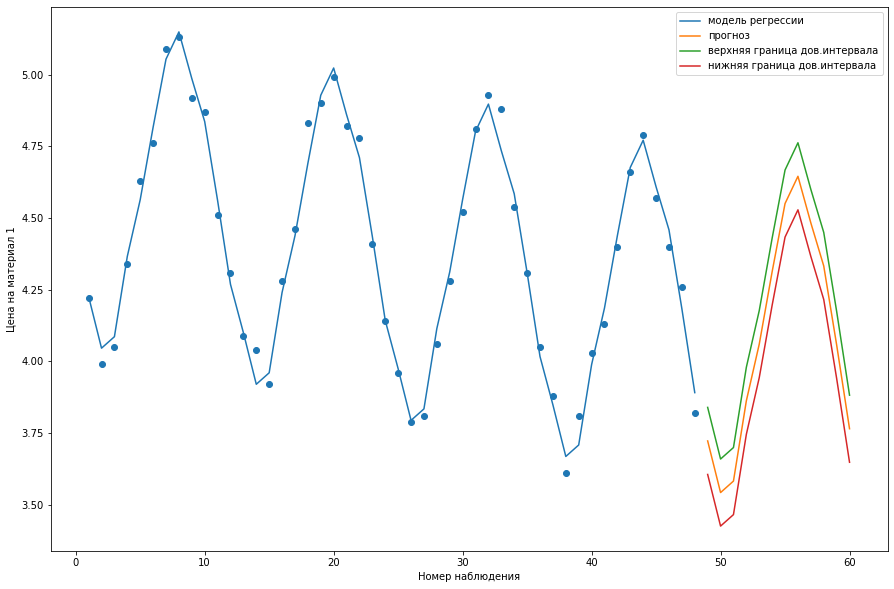

In [232]:
plt.figure(figsize=[15,10])

plt.scatter(t, y)

plt.plot(t,y_pred)
plt.plot(t_new,y_new)
plt.plot(t_new,y_up)
plt.plot(t_new,y_down)

plt.xlabel("Номер наблюдения")
plt.ylabel("Цена на материал 1")
plt.legend(['модель регрессии','прогноз','верхняя граница дов.интервала' ,\
            'нижняя граница дов.интервала'])

plt.show()